# Rigid Stellar Rotation and Gaussian Convolution

The planet/stellar spectrum we observe is an integrated emission from the top of the atmosphere over (parts of) the planet/stellar sphere. The planet/star spin rotation yields a Doppler broadening of the molecular/atomic line. We here demonstrate to include a rigid rotation broadening into the simulated spectrum. 

In practice, we use a specgrograph to observe the spectrum. The response (known as instrumental profile; IP) by the spectrograph also makes the instrumental broadening of the spectrum. 

These effects are essentially a convolution of the kernel to the (raw) spectrum.

In [1]:
import numpy as np
from exojax.utils.grids import wavenumber_grid

2023-03-15 09:49:58.723389: E external/org_tensorflow/tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


In [3]:
nu_grid,wav,res=wavenumber_grid(23000,23100,2000,unit="AA",xsmode="premodit")

xsmode =  premodit
xsmode assumes ESLOG in wavenumber space: mode=premodit


Let's test using a delta function -like spectrum as an input.

In [4]:
#1 - delta function like
F=np.ones_like(nu_grid)
F[1000]=0.0

The rigid rotation is characterized by a single parameter, Vsini, which is the product of the velocity at the planet/stellar equator and sine of the inclination of the spin axis to the observer.

In [5]:
vsini=100.0 #km/s

We can use exojax.spec.response.rigidrot for the rigid rotation, but, for the retrieval, we need a more efficient convolution. We try to the latter here. We define the maximum vsini we will consider (important for retrieval! but now just set the same value as visini) the velocity grid for the convilution. 

In [7]:
from exojax.spec.response import ipgauss_sampling
from exojax.spec.spin_rotation import convolve_rigid_rotation
from exojax.utils.grids import velocity_grid
vsini_max = 100.0
vr_array = velocity_grid(res, vsini_max)

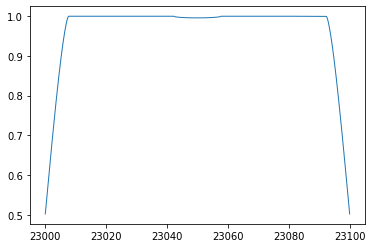

In [8]:
import matplotlib.pyplot as plt
Frot = convolve_rigid_rotation(F, vr_array, vsini, u1=0.0, u2=0.0)
plt.plot(wav,Frot,lw=1)
plt.show()

You find the extreme drops at the right and left sides of the spectrum. This is due to the convolution of the rotation kernel to the edges.
So, you need to set some margin to avoid to use the edges in the analysis. 

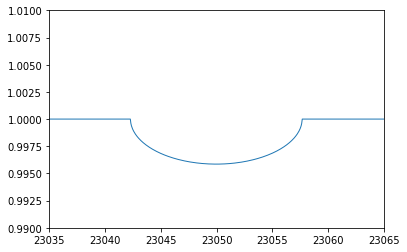

In [9]:
plt.plot(wav,Frot,lw=1)
plt.xlim(23035,23065)
plt.ylim(0.99,1.01)
plt.show()

We confirmed that the rotation convolution was applied to the spectrum. 
The parameters of u1 and u2 are the quadratic Limb darkening coefficients.


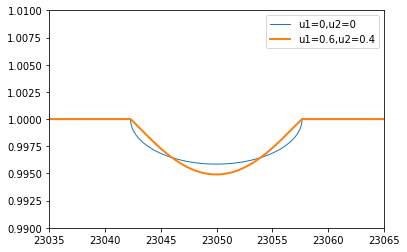

In [10]:
Frot_ld = convolve_rigid_rotation(F, vr_array, vsini, u1=0.6, u2=0.4)
plt.plot(wav,Frot,lw=1,label="u1=0,u2=0")
plt.plot(wav,Frot_ld,lw=2,label="u1=0.6,u2=0.4")
plt.xlim(23035,23065)
plt.ylim(0.99,1.01)
plt.legend()
plt.show()

We can also apply a Gaussian covolution and velocity shift to the spectrum. It should be noted that beta is the standard deviation of a Gaussian.

In [11]:
beta1=20.0 #std of gaussian
beta2=50.0
RV=30.0
Fx=ipgauss_sampling(nu_grid,nu_grid,Frot,beta1,0.0,vr_array)
Fxx=ipgauss_sampling(nu_grid,nu_grid,Frot,beta2,RV,vr_array)

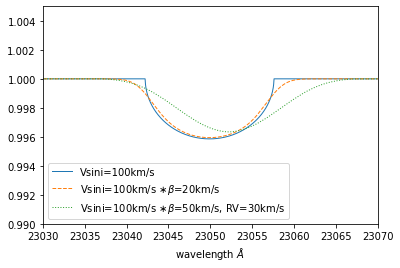

In [12]:
plt.plot(wav[::-1],Frot,lw=1,label="Vsini=100km/s")
plt.plot(wav[::-1],Fx,lw=1,ls="dashed",label="Vsini=100km/s $\\ast \\beta$=20km/s")
plt.plot(wav[::-1],Fxx,lw=1,ls="dotted",label="Vsini=100km/s $\\ast \\beta$=50km/s, RV=30km/s")
plt.legend(loc="lower left")
plt.xlabel("wavelength $\AA$")
plt.xlim(23030,23070)
plt.ylim(0.99,1.005)
plt.show()